In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

customers_url = "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE"
transactions_url = "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF"

customers = pd.read_csv(customers_url)
transactions = pd.read_csv(transactions_url)
customer_transaction_data = transactions.merge(customers, on="CustomerID")

In [5]:
aggregated_data = customer_transaction_data.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean", "count"],
    "Region": "first",
}).reset_index()

aggregated_data.columns = ["CustomerID", "TotalTransactionValue", "AvgTransactionValue", "TransactionCount", "Region"]
aggregated_data["Region"] = aggregated_data["Region"].astype("category").cat.codes
clustering_data = aggregated_data.drop(["CustomerID"], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

In [6]:
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

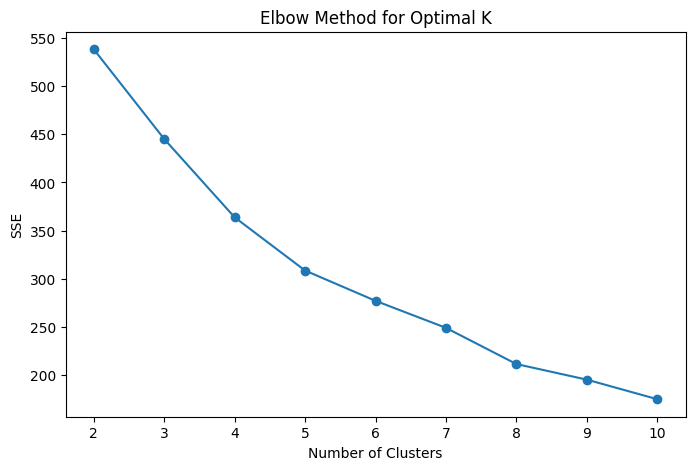

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

In [8]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
aggregated_data["Cluster"] = labels
db_index = davies_bouldin_score(scaled_data, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.202800531291985


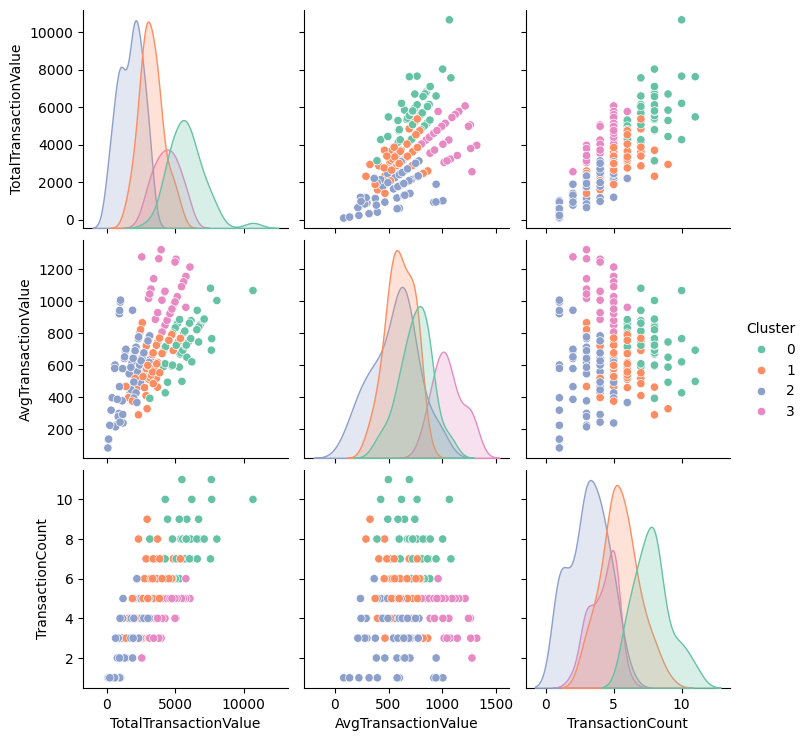

In [9]:
sns.pairplot(
    aggregated_data,
    vars=["TotalTransactionValue", "AvgTransactionValue", "TransactionCount"],
    hue="Cluster",
    palette="Set2",
    diag_kind="kde"
)
plt.show()

In [10]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=clustering_data.columns)
print("Cluster Centroids:")
print(centroid_df)

Cluster Centroids:
   TotalTransactionValue  AvgTransactionValue  TransactionCount    Region
0            5823.466818           751.988091          7.840909  1.227273
1            3239.038814           606.307419          5.457627  2.542373
2            1731.414179           558.434236          3.149254  1.014925
3            4367.413103          1053.577540          4.206897  1.620690
